### Operational Model 

In [292]:
%load_ext autoreload
%autoreload 2

import numpy as np
import random
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
import os
from sklearn.feature_selection import RFECV
import pandas as pd
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
    train_test_split,
    KFold)
import numpy as np
from numpy.lib.function_base import average
import pandas as pd
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error,
    recall_score,
    f1_score,
    precision_score,
    confusion_matrix,
    make_scorer)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import importlib
import os
from sklearn.feature_selection import (
    SelectKBest,
    SequentialFeatureSelector,
    RFE,
    mutual_info_regression,
    f_regression,
    mutual_info_classif)
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance
import xgboost as xgb
import pickle
import openpyxl
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import geopandas as gpd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [293]:
# Setting directory
wor_dir="/home/fbf/"


wor_dir="C:/Typhoon_IBF/Typhoon-Impact-based-forecasting-model/IBF-Typhoon-model"

os.chdir(wor_dir)

cdir = os.getcwd()

### Loading the data

In [294]:
combined_input_data=pd.read_csv("data/model_input/df_modelinput_july.csv") 
tphoon_events=combined_input_data[['typhoon','DAM_perc_dmg']].groupby('typhoon').size().to_dict()
### for hyper parameter optimization we looped over typhoon events with at least 100 data entries  

typhoons_with_impact_data= [key for key,value in tphoon_events.items() if value>100]
combined_input_data=combined_input_data[combined_input_data.typhoon.isin(typhoons_with_impact_data)]

In [295]:
def set_zeros(x):
    x_max = 25
    y_max = 50    
    v_max = x[0]
    rainfall_max = x[1]
    damage = x[2]
    if pd.notnull(damage):
        value = damage
    elif v_max > x_max or rainfall_max > y_max:
        value =damage
    elif (v_max < np.sqrt((1- (rainfall_max**2/y_max ** 2))*x_max ** 2)):
        value = 0
    #elif ((v_max < x_max)  and  (rainfall_max_6h < y_max) ):
    #elif (v_max < x_max ):
    #value = 0
    else:
        value = np.nan
    return value

combined_input_data["DAM_perc_dmg"] = combined_input_data[["HAZ_v_max", "HAZ_rainfall_Total", "DAM_perc_dmg"]].apply(set_zeros, axis="columns")

In [296]:
# Setting the selected features for XGB

selected_features_xgb_regr= [#'HAZ_rainfall_max_24h',
                                       'HAZ_v_max',
                                       #'HAZ_dis_track_min',
                                       'TOP_mean_slope',
                                       'TOP_mean_elevation_m',
                                       'TOP_ruggedness_stdev',
                                       'TOP_mean_ruggedness',
                                       'TOP_slope_stdev',
                                       'VUL_poverty_perc',
                                       'GEN_with_coast',
                                       'VUL_Housing_Units',
                                       'VUL_StrongRoof_StrongWall',
                                       'VUL_StrongRoof_LightWall',
                                       'VUL_StrongRoof_SalvageWall',
                                       'VUL_LightRoof_StrongWall',
                                       'VUL_LightRoof_LightWall',
                                       'VUL_SalvagedRoof_StrongWall',
                                       'VUL_SalvagedRoof_LightWall',
                                       'VUL_SalvagedRoof_SalvageWall',
                                       'VUL_vulnerable_groups',
                                       'VUL_pantawid_pamilya_beneficiary']

### result of parameter optimization 

In [297]:
selected_params_xgb_regr={'colsample_bytree': 1.0,
                          'eta': 0.05,
                          'gamma': 1.0,
                          'learning_rate': 0.025,
                          'max_depth': 8,
                          'min_child_weight': 1.0,
                          'n_estimators': 200.0,
                          'early_stopping_rounds ':10,
                          'subsample': 0.8
                          }
wor_dir="C:/Typhoon_IBF/Typhoon-Impact-based-forecasting-model/IBF-Typhoon-model"
file_name = "models/output/v2/selected_params_xgb_regr.p"
 

In [298]:
# split data into train and test sets

SEED2 = 314159265
SEED = 31 
 
test_size = 0.2

# Full dataset for feature selection

combined_input_data_ = combined_input_data[combined_input_data['DAM_perc_dmg'].notnull()]
 

selected_features_xgb_regr= [#'HAZ_rainfall_max_24h',
                                       'HAZ_v_max',
                                       #'HAZ_dis_track_min',
                                       'TOP_mean_slope',
                                       'TOP_mean_elevation_m',
                                       'TOP_ruggedness_stdev',
                                       'TOP_mean_ruggedness',
                                       'TOP_slope_stdev',
                                       'VUL_poverty_perc',
                                       'GEN_with_coast',
                                       'VUL_Housing_Units',
                                       'VUL_StrongRoof_StrongWall',
                                       'VUL_StrongRoof_LightWall',
                                       'VUL_StrongRoof_SalvageWall',
                                       'VUL_LightRoof_StrongWall',
                                       'VUL_LightRoof_LightWall',
                                       'VUL_SalvagedRoof_StrongWall',
                                       'VUL_SalvagedRoof_LightWall',
                                       'VUL_SalvagedRoof_SalvageWall',
                                       'VUL_vulnerable_groups',
                                       'VUL_pantawid_pamilya_beneficiary']


X = combined_input_data_[selected_features_xgb_regr]
y = combined_input_data_["DAM_perc_dmg"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=SEED)


# fit model no training data

 

 
 


 
from sklearn.metrics import mean_squared_error,mean_absolute_error

 
reg = xgb.XGBRegressor(base_score=0.5,
             booster='gbtree', 
             subsample=0.8,
             eta=0.05,
             max_depth=8, 
             colsample_bylevel=1,
             colsample_bynode=1, 
             colsample_bytree=1,
             early_stopping_rounds=10, 
             eval_metric=mean_absolute_error,
             gamma=1, 
             objective='reg:squarederror',
             gpu_id=-1, 
             grow_policy='depthwise', 
             learning_rate=0.025,
             min_child_weight=1,
             n_estimators=200,        
             random_state=42,
             tree_method="hist",
             )

eval_set=[(X_train, y_train), ( X_test, y_test)]

reg.fit(X, y, eval_set=eval_set)

 
y_pred = reg.predict(X_test)

[0]	validation_0-rmse:8.27727	validation_0-mean_absolute_error:2.19847	validation_1-rmse:8.92043	validation_1-mean_absolute_error:2.34337
[1]	validation_0-rmse:8.14339	validation_0-mean_absolute_error:2.16248	validation_1-rmse:8.76018	validation_1-mean_absolute_error:2.30126
[2]	validation_0-rmse:8.00961	validation_0-mean_absolute_error:2.12668	validation_1-rmse:8.62280	validation_1-mean_absolute_error:2.26197
[3]	validation_0-rmse:7.87851	validation_0-mean_absolute_error:2.09163	validation_1-rmse:8.47360	validation_1-mean_absolute_error:2.22207
[4]	validation_0-rmse:7.74396	validation_0-mean_absolute_error:2.05717	validation_1-rmse:8.33841	validation_1-mean_absolute_error:2.18639
[5]	validation_0-rmse:7.61667	validation_0-mean_absolute_error:2.02454	validation_1-rmse:8.20573	validation_1-mean_absolute_error:2.15282
[6]	validation_0-rmse:7.49559	validation_0-mean_absolute_error:1.99410	validation_1-rmse:8.07767	validation_1-mean_absolute_error:2.12061
[7]	validation_0-rmse:7.38205	vali

In [299]:
y_pred = reg.predict(X)
combined_input_data_['DMG_predicted']=y_pred

C:\Users\ATEKLE~1\AppData\Local\Temp/ipykernel_10620/2279594552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_input_data_['DMG_predicted']=y_pred


In [300]:
admin_df =gpd.read_file('C:/Typhoon_IBF/Typhoon-Impact-based-forecasting-model/IBF-Typhoon-model/data/wind_data/input/phl_admin3_simpl2.geojson')
f_path = os.path.join(wor_dir,"data/all_predisaster_indicators.csv")
df_predisasters = pd.read_csv(f_path)

IMPACT_DF0 = pd.merge(combined_input_data_, df_predisasters[['Housing Units','Mun_Code']],  how='left', left_on='Mun_Code', right_on = 'Mun_Code') 
IMPACT_DF0['Hu']=0.01*IMPACT_DF0['Housing Units']

impact_scenarios=['DAM_perc_dmg', 'DMG_predicted']

IMPACT_DF0.loc[:,impact_scenarios] = IMPACT_DF0.loc[:,impact_scenarios].multiply(IMPACT_DF0.loc[:, 'Hu'], axis="index")
IMPACT_DF0[impact_scenarios] = IMPACT_DF0[impact_scenarios].astype('int')
IMPACT_DF0.rename(columns={'DAM_perc_dmg':'DAM_number_Hous_DROMIC', 'DMG_predicted':'DAM_number_Hous_Model'},inplace=True)

file_path=os.path.join(wor_dir,'results/Damage_for_historical_events_perc.csv') 
combined_input_data_[['typhoon', 'Mun_Code', 'DAM_perc_dmg', 'DMG_predicted']].to_csv(file_path)
file_path=os.path.join(wor_dir,'results/Damage_for_historical_events_number.csv') 
IMPACT_DF0[['typhoon', 'Mun_Code', 'DAM_number_Hous_DROMIC', 'DAM_number_Hous_Model']].to_csv(file_path)

### model input for return period

In [302]:
# Path to the windout
fpath = os.path.join(wor_dir,"data/model_input/model_input_for_returnperiod_storm.csv")
df_total=pd.read_csv(fpath)

scenarios_=['HAZ_wind_10',#'HAZ_wind_1000','HAZ_wind_10000',
            'HAZ_wind_20',#'HAZ_wind_2000',
            'HAZ_wind_30',#'HAZ_wind_3000',
            'HAZ_wind_40',#'HAZ_wind_4000',
            'HAZ_wind_50',#'HAZ_wind_5000',
            'HAZ_wind_60',#'HAZ_wind_600','HAZ_wind_6000',
            'HAZ_wind_70',#'HAZ_wind_700','HAZ_wind_7000',
            'HAZ_wind_80',#'HAZ_wind_800','HAZ_wind_8000',
            'HAZ_wind_90',
            'HAZ_wind_100',
            'HAZ_wind_200',
            'HAZ_wind_300',
            'HAZ_wind_400',
            'HAZ_wind_500',#'HAZ_wind_900','HAZ_wind_9000'
            ]

impact_rp={}

impact_rp['Mun_Code']=df_total['Mun_Code'].values

impact_dfs=[]
zonal_stats_dF=pd.DataFrame()
zonal_stats_dF["Mun_Code"]=df_total['Mun_Code'].values

 


for scenarios in scenarios_:
    df_total_ = df_total.copy()#[df_total[scenarios].notnull()]
    df_total_['HAZ_v_max']=1.21*df_total_[scenarios]  # factor by 1.21 for STORM data (10min to 1 min ) and divide by 1.49 for Pagasa (3sec to 1 min)
    X = df_total_[selected_features_xgb_regr]
    index='DMG'+scenarios[3:]   
    impact_rp[index]=reg.predict(X)   
    zonal_stats_d=pd.DataFrame()
    zonal_stats_d[index]=reg.predict(X)    
    zonal_stats_d["Mun_Code"]=df_total['Mun_Code'].values
    impact_dfs.append(zonal_stats_d) 
    
 

#impact_df=pd.DataFrame.from_dict(impact_rp)

for dfs in impact_dfs:
    zonal_stats_dF=pd.merge(zonal_stats_dF,dfs,left_on='Mun_Code',right_on='Mun_Code')

IMPACT_DF = pd.merge(zonal_stats_dF, df_predisasters[['Housing Units','Mun_Code']],  how='left', left_on='Mun_Code', right_on = 'Mun_Code') 
IMPACT_DF['Hu']=0.01*IMPACT_DF['Housing Units']

impact_scenarios=['DMG_wind_10', 'DMG_wind_20', 'DMG_wind_30', 'DMG_wind_40',
    'DMG_wind_50', 'DMG_wind_60', 'DMG_wind_70', 'DMG_wind_80',
    'DMG_wind_90', 'DMG_wind_100', 'DMG_wind_200', 'DMG_wind_300',
    'DMG_wind_400', 'DMG_wind_500']

IMPACT_DF.loc[:,impact_scenarios] = IMPACT_DF.loc[:,impact_scenarios].multiply(IMPACT_DF.loc[:, 'Hu'], axis="index")
IMPACT_DF[impact_scenarios] = IMPACT_DF[impact_scenarios].astype('int')

scenarios_df=[]

for scenarios in scenarios_:
    index='DMG'+scenarios[3:]   
    imp_df=IMPACT_DF[['Mun_Code',index]].copy()
    imp_df['typhoon']='rp'+scenarios[4:]  
    df_1 = imp_df#pd.merge(imp_df[['typhoon','Mun_Code',index]], df_predisasters[['Housing Units','Mun_Code']],  how='left', left_on='Mun_Code', right_on = 'Mun_Code') 
    df_1_agg=df_1.groupby('typhoon').agg(NUmber_of_affected_municipality=('Mun_Code','count'),                                     
                                     Total_buildings_rp=(index, sum)).reset_index()
    scenarios_df.append(df_1_agg)
    
df=pd.concat(scenarios_df, axis=0)
df.sort_values(by=["Total_buildings_rp"])



,typhoon,NUmber_of_affected_municipality,Total_buildings_rp
0,rpwind_30,1647,643674
0,rpwind_40,1647,649508
0,rpwind_20,1647,703355
0,rpwind_50,1647,757187
0,rpwind_60,1647,815352
0,rpwind_70,1647,885576
0,rpwind_80,1647,898910
0,rpwind_10,1647,934770
0,rpwind_90,1647,968063
0,rpwind_100,1647,988564


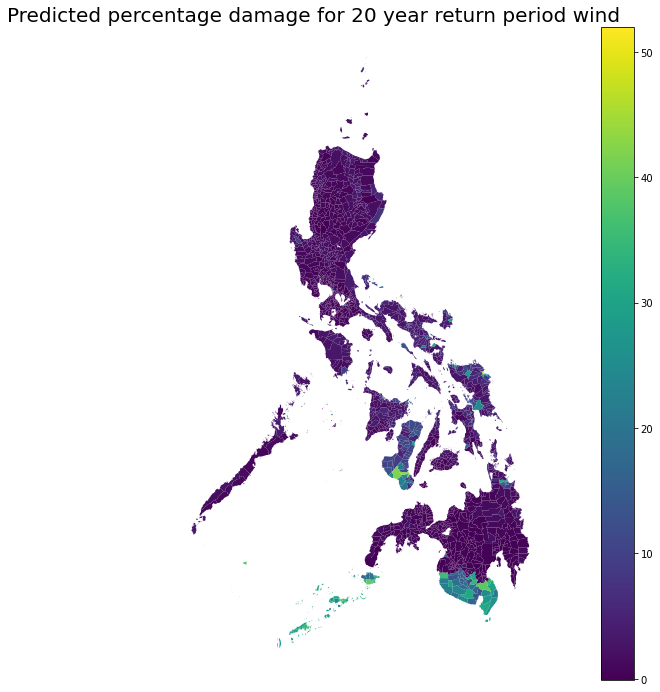

In [303]:

df_imact_SORM = pd.merge(
    admin_df[["adm3_en", "geometry","adm3_pcode"]],
    zonal_stats_dF,
    how="left",
    left_on="adm3_pcode",
    right_on="Mun_Code",
)

#df_imact2=df_imact.query("Mun_Code== @areas_impact_history")
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1)
df_imact_SORM.plot(column='DMG_wind_20',ax=ax,legend=True)
leg = ax.get_legend()
plt.title('Predicted percentage damage for 20 year return period wind',fontsize=20)
#leg.set_bbox_to_anchor((1.15,0.5))
ax.set_axis_off()
plt.show()

In [305]:
file_path=os.path.join(wor_dir,'results/Damage_for_STORM_WIND_SEVIERTY_RP_percentage.csv')
df_imact_SORM[['adm3_en', 'Mun_Code', 'DMG_wind_10',
       'DMG_wind_20', 'DMG_wind_30', 'DMG_wind_40', 'DMG_wind_50',
       'DMG_wind_60', 'DMG_wind_70', 'DMG_wind_80', 'DMG_wind_90',
       'DMG_wind_100', 'DMG_wind_200', 'DMG_wind_300', 'DMG_wind_400',
       'DMG_wind_500']].to_csv(file_path)

file_path=os.path.join(wor_dir,'results/Damage_for_STORM_WIND_SEVIERTY_RP_numberOfBuildings.csv')
IMPACT_DF[['Mun_Code', 'DMG_wind_10',
       'DMG_wind_20', 'DMG_wind_30', 'DMG_wind_40', 'DMG_wind_50',
       'DMG_wind_60', 'DMG_wind_70', 'DMG_wind_80', 'DMG_wind_90',
       'DMG_wind_100', 'DMG_wind_200', 'DMG_wind_300', 'DMG_wind_400',
       'DMG_wind_500']].to_csv(file_path)

### PAGASA

In [312]:
# Path to the pagasa wind 
fpath = os.path.join(wor_dir,"data/model_input/model_input_for_returnperiod_pagasa.csv")
df_total=pd.read_csv(fpath)

scenarios_2=['HAZ_wind_20_min', 'HAZ_wind_20', 'HAZ_wind_50_min', 'HAZ_wind_50',
            'HAZ_wind_100_min', 'HAZ_wind_100', 'HAZ_wind_200_min', 'HAZ_wind_200',
            'HAZ_wind_500_min', 'HAZ_wind_500'
            ]
impact_dfs=[]


for scenarios in scenarios_2:
    df_total_ = df_total.copy()#[df_total[scenarios].notnull()]
    df_total_['HAZ_v_max']=0.6711*df_total_[scenarios]  # factor by 1.21 for STORM data (10min to 1 min ) and divide by 1.49 for Pagasa (3sec to 1 min)
    X = df_total_[selected_features_xgb_regr]
    index='DMG'+scenarios[3:]   
  
    zonal_stats_d=pd.DataFrame()
    zonal_stats_d[index]=reg.predict(X)    
    zonal_stats_d["Mun_Code"]=df_total['Mun_Code'].values
    impact_dfs.append(zonal_stats_d) 
    
zonal_stats_dF2=pd.DataFrame()
zonal_stats_dF2["Mun_Code"]=df_total['Mun_Code'].values 

#impact_df=pd.DataFrame.from_dict(impact_rp)

for dfs in impact_dfs:
    zonal_stats_dF2=pd.merge(zonal_stats_dF2,dfs,left_on='Mun_Code',right_on='Mun_Code')
    
IMPACT_DF2 = pd.merge(zonal_stats_dF2, df_predisasters[['Housing Units','Mun_Code']],  how='left', left_on='Mun_Code', right_on = 'Mun_Code') 

IMPACT_DF2['Hu']=0.01*IMPACT_DF2['Housing Units']

impact_scenarios=['DMG_wind_20_min', 'DMG_wind_20', 'DMG_wind_50_min', 'DMG_wind_50',
            'DMG_wind_100_min', 'DMG_wind_100', 'DMG_wind_200_min', 'DMG_wind_200',
            'DMG_wind_500_min', 'DMG_wind_500']

IMPACT_DF2.loc[:,impact_scenarios] = IMPACT_DF2.loc[:,impact_scenarios].multiply(IMPACT_DF2.loc[:, 'Hu'], axis="index")
IMPACT_DF2[impact_scenarios] = IMPACT_DF2[impact_scenarios].astype('int')

scenarios_df=[]

for scenarios in scenarios_2:
    index='DMG'+scenarios[3:]   
    imp_df=IMPACT_DF2[['Mun_Code',index]].copy()
    imp_df['typhoon']='rp'+scenarios[4:]  
    df_1 = imp_df#pd.merge(imp_df[['typhoon','Mun_Code',index]], df_predisasters[['Housing Units','Mun_Code']],  how='left', left_on='Mun_Code', right_on = 'Mun_Code') 
    df_1_agg=df_1.groupby('typhoon').agg(NUmber_of_affected_municipality=('Mun_Code','count'),                                     
                                     Total_buildings_rp=(index, sum)).reset_index()
    scenarios_df.append(df_1_agg)
    
df=pd.concat(scenarios_df, axis=0)
df.sort_values(by=["Total_buildings_rp"])

,typhoon,NUmber_of_affected_municipality,Total_buildings_rp
0,rpwind_20_min,1647,3128637
0,rpwind_50_min,1647,3984603
0,rpwind_100_min,1647,4085671
0,rpwind_20,1647,4173220
0,rpwind_200_min,1647,4216128
0,rpwind_500_min,1647,4329617
0,rpwind_50,1647,5123955
0,rpwind_100,1647,5157603
0,rpwind_200,1647,5186703
0,rpwind_500,1647,5207855


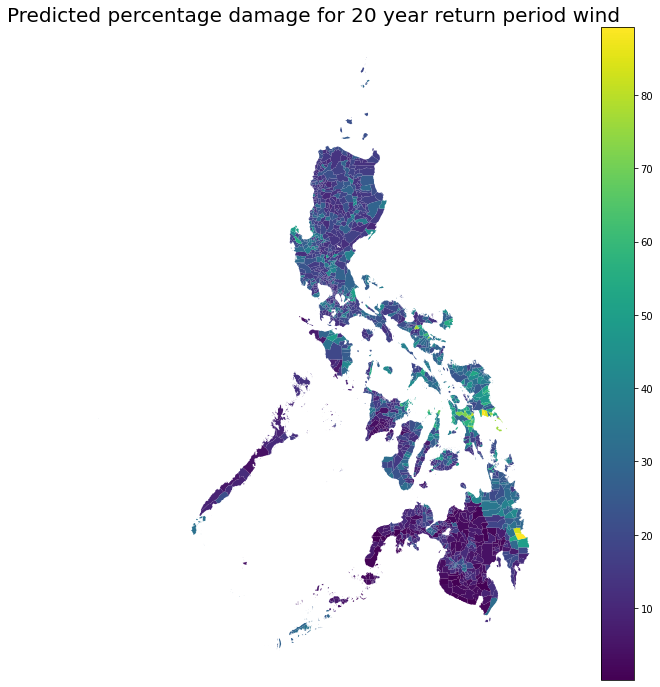

In [313]:

df_imact_PAG = pd.merge(
    admin_df[["adm3_en", "geometry","adm3_pcode"]],
    zonal_stats_dF2,
    how="left",
    left_on="adm3_pcode",
    right_on="Mun_Code",
)
 
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1)
df_imact_PAG.plot(column='DMG_wind_20',ax=ax,legend=True)
leg = ax.get_legend()
plt.title('Predicted percentage damage for 20 year return period wind',fontsize=20)
#leg.set_bbox_to_anchor((1.15,0.5))
ax.set_axis_off()
plt.show()
 

In [314]:
file_path=os.path.join(wor_dir,'results/Damage_for_PAGASA_WIND_SEVIERTY_RP_perc.csv')
df_imact_PAG[['adm3_en', 'Mun_Code', 'DMG_wind_20_min',
       'DMG_wind_20', 'DMG_wind_50_min', 'DMG_wind_50', 'DMG_wind_100_min',
       'DMG_wind_100', 'DMG_wind_200_min', 'DMG_wind_200', 'DMG_wind_500_min',
       'DMG_wind_500']].to_csv(file_path)

file_path=os.path.join(wor_dir,'results/Damage_for_PAGASA_WIND_SEVIERTY_RP_numberOfBuild.csv')
IMPACT_DF2[[ 'Mun_Code', 'DMG_wind_20_min',
       'DMG_wind_20', 'DMG_wind_50_min', 'DMG_wind_50', 'DMG_wind_100_min',
       'DMG_wind_100', 'DMG_wind_200_min', 'DMG_wind_200', 'DMG_wind_500_min',
       'DMG_wind_500']].to_csv(file_path)

#### BASED ON EVENTS